# Google Data Analytics Case Study 2: Bellabeat - Using Python

### Import Libraries

In [276]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Loading Datasets

In [311]:
activity = pd.read_csv('archive (1)\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv')
sleep = pd.read_csv('archive (1)\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv')
intensities = pd.read_csv('archive (1)\Fitabase Data 4.12.16-5.12.16\hourlyIntensities_merged.csv')


### Look at the data

In [308]:

sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [279]:
activity.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [301]:
intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
0,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,2016-04-12
1,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,2016-04-12
2,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,2016-04-12
3,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,2016-04-12
4,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,2016-04-12


In [280]:
# find out missing values in acivity data
missing_value_count= activity.isnull().sum()
missing_value_count

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [281]:
#check the datatypes
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [282]:
# check the number of unique Id 
Unique_id = len(activity['Id'].unique())
print('Number  of unique ids : {}'.format(Unique_id))

Number  of unique ids : 33


### Normalizing the data

In [283]:
#convert the activity column ActivityDate to datetime64 dtype and format to yyyy-mm-dd
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'],format='%m/%d/%Y')

#reprint to confirm
activity.info()
activity['ActivityDate'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [284]:
#convert intensities data ActivityHour into a datatime
intensities['ActivityHour'] = pd.to_datetime(intensities['ActivityHour'],format="%m/%d/%Y %I:%M:%S %p")
intensities['time'] = intensities['ActivityHour'].dt.time
intensities['date'] = intensities['ActivityHour'].dt.date
intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
0,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,2016-04-12
1,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,2016-04-12
2,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,2016-04-12
3,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,2016-04-12
4,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,2016-04-12


In [285]:
#create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 
            'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes',
            'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']
df_activity = activity.reindex(columns=new_cols)
df_activity.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [286]:
# create new column "day_of_the_week" to represent day of the week 

df_activity['DayOfTheWeek'] = df_activity['ActivityDate'].dt.dayofweek
df_activity['DayOfTheWeek'] = df_activity['DayOfTheWeek'].astype('category')
df_activity.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,1,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,2,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,3,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,4,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,5,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [287]:
# rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,1,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,2,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,3,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,4,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,5,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [288]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [289]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

# print 1st 5 rows to confirm
df_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

# Analyze and Visualize

In [290]:
df_activity.describe()

,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862


Text(0, 0.5, 'Frequecy')

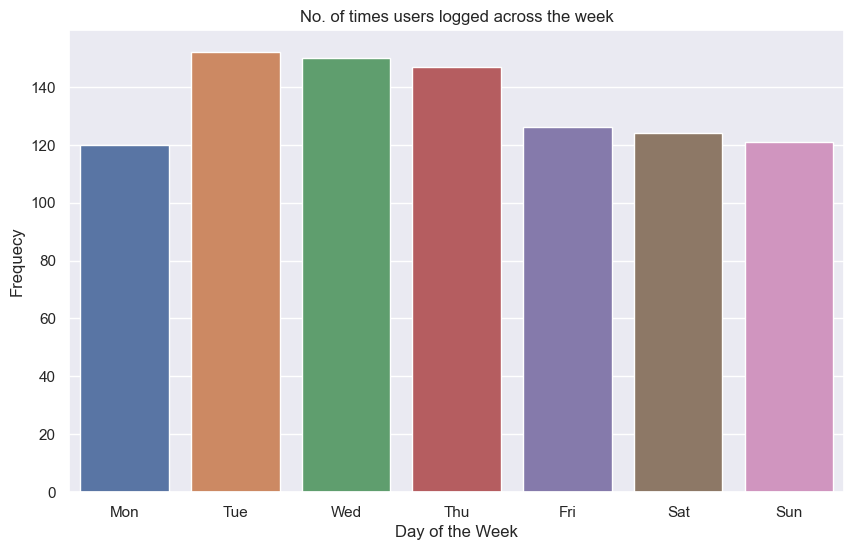

In [291]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.countplot(x=df_activity['day_of_the_week'])
day_of_week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(range(7),day_of_week)

plt.title('No. of times users logged across the week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequecy')



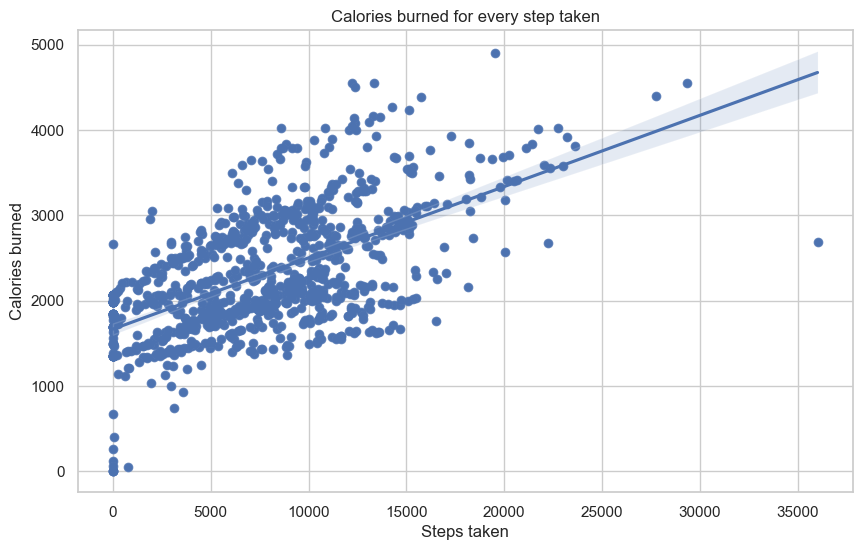

In [292]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.scatterplot(x='total_steps',y='calories',data=df_activity)
sns.regplot(x='total_steps',y='calories',data=df_activity)

plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.show()


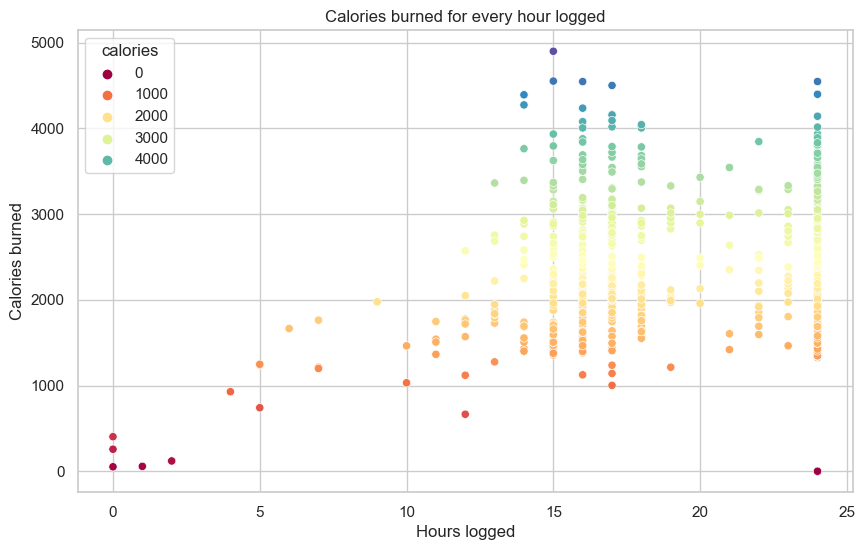

In [293]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.scatterplot(x='total_hours',y='calories',data=df_activity,hue='calories',palette='Spectral')
# sns.regplot(x='total_hours',y='calories',data=df_activity)

plt.xlabel("Hours logged")

plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.show()

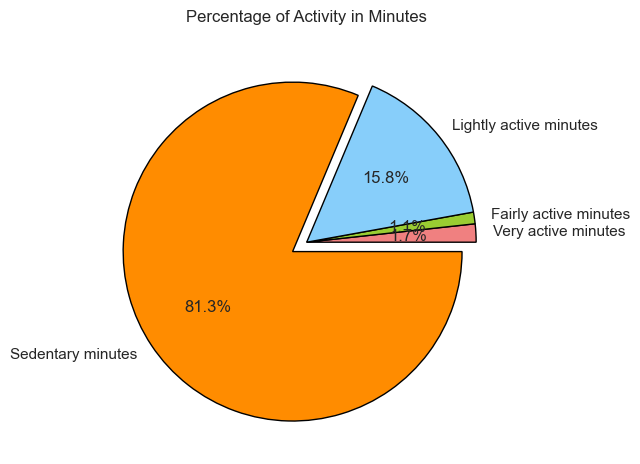

In [294]:
#calculate total of individual minutes column
very_acitve_mins = df_activity['very_active_mins'].sum()
fairly_active_mins = df_activity['fairly_active_mins'].sum()
lightly_acitive_mins = df_activity['lightly_active_mins'].sum()
sedentary_mins = df_activity['sedentary_mins'].sum()

#plotting pie chart
data = [very_acitve_mins,fairly_active_mins,lightly_acitive_mins,sedentary_mins]
keys =  ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.pie(data,labels=keys,autopct='%1.1f%%',colors=colours,wedgeprops={'edgecolor':'black'},explode=explode)
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()


<Axes: xlabel='TotalMinutesAsleep', ylabel='TotalTimeInBed'>

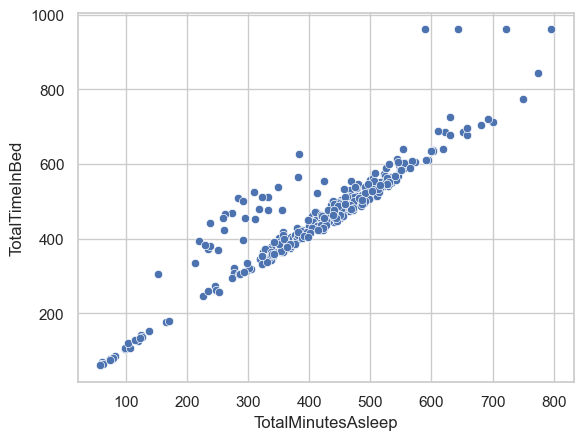

In [295]:
sns.scatterplot(data=sleep,x='TotalMinutesAsleep',y='TotalTimeInBed')

Text(0.5, 1.0, 'Average Total Intensity vs Time')

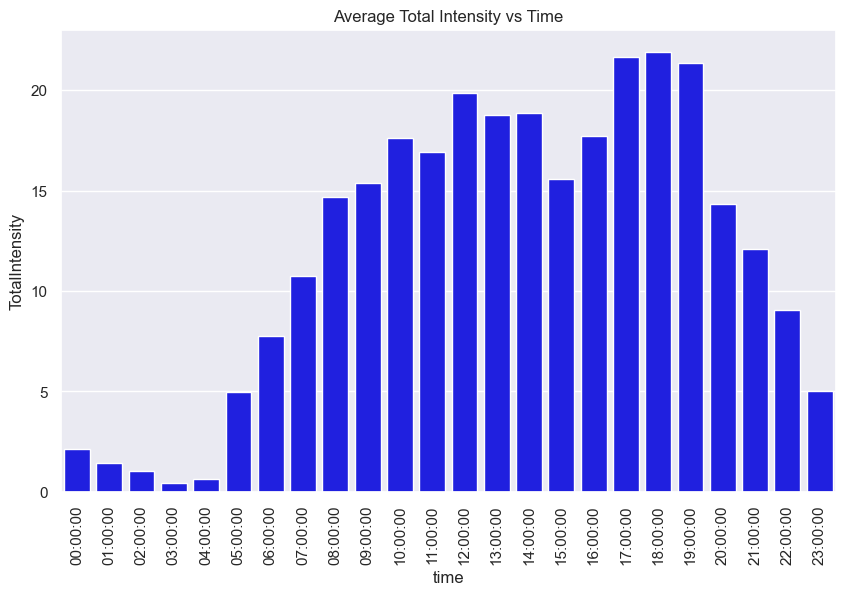

In [296]:
int_new = intensities.groupby('time')['TotalIntensity'].mean().reset_index()
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(data=int_new,x='time',y='TotalIntensity',color='blue')
plt.xticks(rotation=90)
plt.title('Average Total Intensity vs Time')

<Axes: xlabel='calories', ylabel='total_steps'>

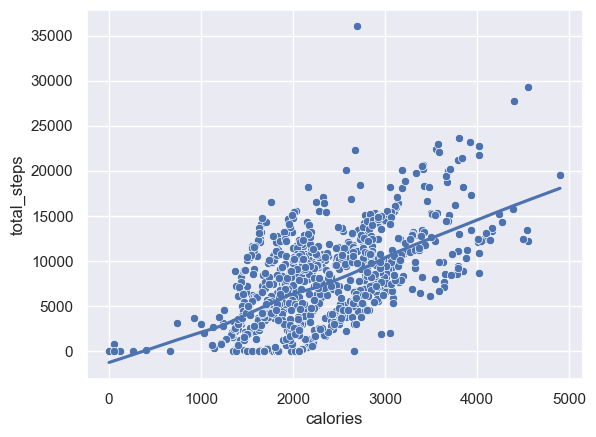

In [313]:
sns.scatterplot(x=df_activity['calories'],y=df_activity['total_steps'])
sns.regplot(x=df_activity['calories'],y=df_activity['total_steps'],scatter=False,lowess=True)